In [1]:
%matplotlib inline


# Comparar o efeito de diferentes escaladores em dados com outliers


Este tutorial foi traduzido de [Fonte:scikit-learn.org](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py). O objetivo do tutorial é apresentar diferentes classes do pacote ``SciKit Learn`` para escalar, transformar e normalizar dados. Neste tutorial utilizaremos o conjunto de dados [habitação da Califórnia](<http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>) como exemplo de tratamento de dados.

A característica renda média em um bloco e a característica número de famílias do conjunto de dados da [habitação da Califórnia](<http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>) têm escalas muito diferentes e contêm alguns outliers. Essas duas características levam a dificuldades para visualizar os dados e, o que é mais importante, podem degradar o desempenho preditivo de muitos algoritmos de aprendizado de máquina. Os dados não escalados também podem diminuir a velocidade ou mesmo evitar a convergência de muitos estimadores baseados em gradientes.

Na verdade, muitos estimadores são projetados com a suposição de que cada recurso leva valores próximos de zero ou mais importante que todos os recursos variam em escalas comparáveis. Em particular, os estimadores baseados em métricas e baseados em gradientes geralmente assumem dados aproximadamente padronizados (caracteríticas com valores centrados com variâncias unitárias). Uma exceção notável são os estimadores baseados em árvores de decisão que são robustos para a escala arbitrária dos dados.

Este exemplo usa diferentes escaladores, transformadores e normalizadores para mapear os dados dentro de um intervalo pré-definido.

1. Scalers são transformadores lineares e diferem uns dos outros na forma de estimar os parâmetros usados para deslocar e dimensionar cada característica.
2. QuantileTransformer fornece uma transformação não linear em que as distâncias entre outliers marginais e inliers são encolhidas.
3. Ao contrário das transformações anteriores, a normalização refere-se à uma transformação por amostra ao invés de uma transformação por característica.

O código a seguir apresenta em detalhes a comparação desses três métodos.



In [2]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

from __future__ import print_function

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X))
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


Serão mostrados dois gráficos para cada escalador / normalizador / transformador. A figura à esquerda mostrará um gráfico de dispersão do conjunto de dados completo, enquanto a figura da direita excluirá os valores extremos, considerando apenas 99% do conjunto de dados, excluindo os valores aberrantes marginais (outliers). Além disso, as distribuições marginais para cada característica serão mostradas ao lado do gráfico de dispersão.

In [3]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cm.plasma_r,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')


Dados Originais
-------------

Cada transformação é plotada mostrando dois recursos transformados, com o gráfico esquerdo mostrando todo o conjunto de dados, e o zoom direito para mostrar o conjunto de dados sem outliers marginais. Uma grande maioria das amostras são compactadas para um intervalo específico, [0, 10] para a renda mediana e [0, 6] para o número de famílias. Observe que existem alguns outliers (alguns blocos têm mais de 1200 famílias). Portanto, um pré-processamento específico pode ser muito benéfico dependendo da aplicação. No que se segue, apresentamos algumas idéias e comportamentos desses métodos de pré-processamento na presença de outliers.



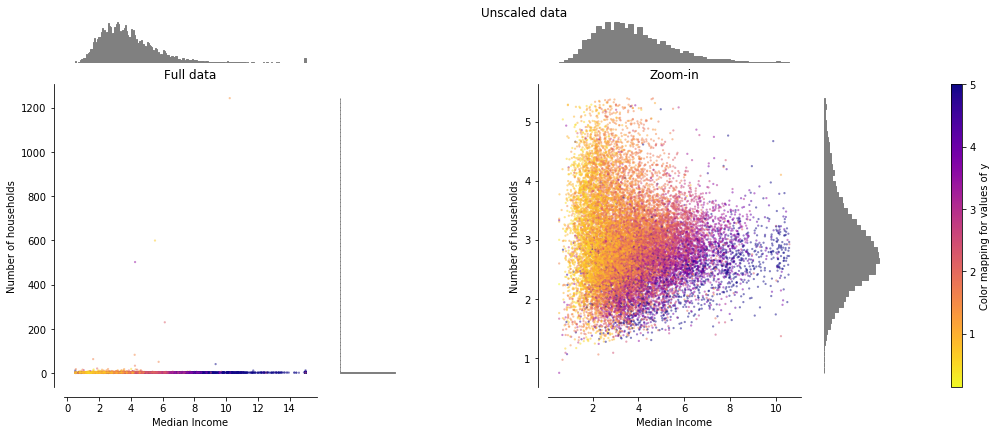

In [4]:
make_plot(0)

StandardScaler
--------------

`` StandardScaler`` remove a média e escala os dados para variância unitária. No entanto, os outliers têm influência ao calcular a média empírica e o desvio padrão que reduzem o alcance dos valores da característica como mostrado na figura esquerda abaixo. Note-se, em particular, que, uma vez que os outliers em cada característica têm diferentes magnitudes, a propagação dos dados transformados sobre cada característica é muito diferente: a maioria dos dados está no intervalo [-2, 4] para o caracterítica de renda mediana transformada enquanto os mesmos dados são espremidos na menor faixa [-0.2, 0.2] para o dado transformado para o número de famílias.

`` StandardScaler``, portanto, não pode garantir escalas equilibradas das características  na presença de outliers.



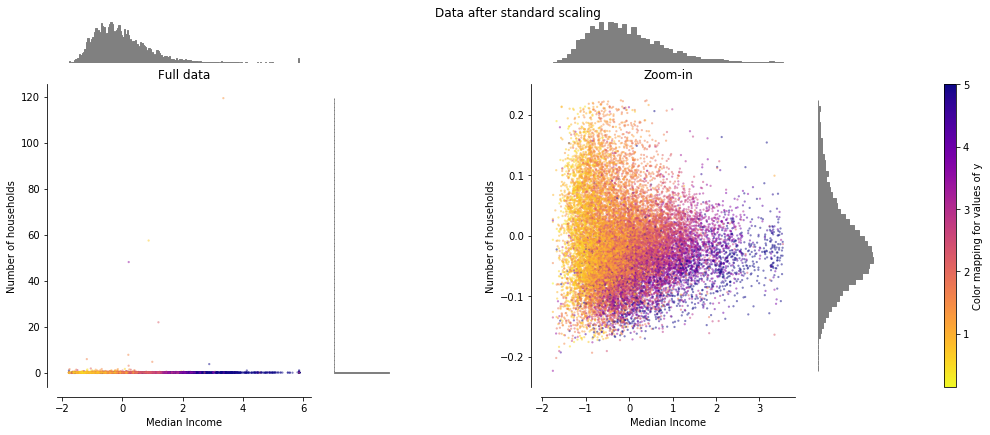

In [10]:
make_plot(1)

MinMaxScaler
------------

O MinMaxScaler recalcula o conjunto de dados de modo que todos os valores da característica estejam no intervalo [0, 1] como mostrado no painel direito abaixo. No entanto, esta escala compacta todos os índices na faixa estreita [0, 0.005] para o dados transformado para a característica número de famílias.

Como o ``StandardScaler``, o ``MinMaxScaler`` é muito sensível à presença de outliers.




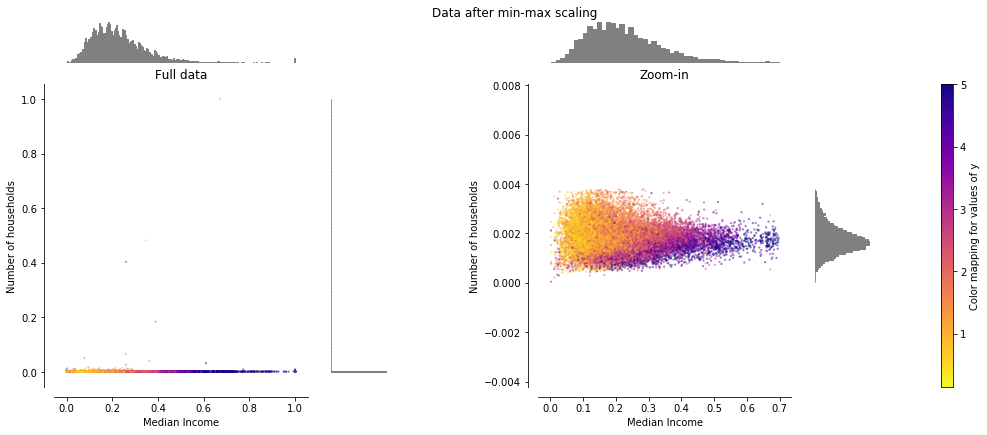

In [11]:
make_plot(2)

MaxAbsScaler
------------

`` MaxAbsScaler`` difere do escalador anterior, de modo que os valores absolutos sejam mapeados na faixa [0, 1]. Em dados positivos apenas, este escalador se comporta de forma semelhante ao `` MinMaxScaler`` e, portanto, também sofre com a presença de outliers.



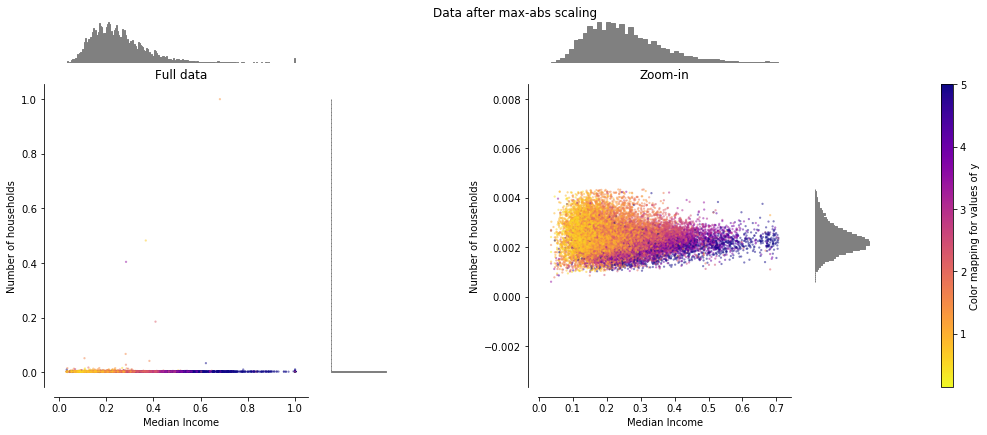

In [12]:
make_plot(3)

RobustScaler
------------

Ao contrário dos scalers anteriores, as estatísticas de centralização e escala deste escalador são baseadas em percentis e, portanto, não são influenciadas por alguns poucos outliers muito grandes. Consequentemente, a gama resultante dos valores das características transformadas é maior do que para os escaladores anteriores e, mais importante ainda, são aproximadamente semelhantes: para ambas as características, a maioria dos valores transformados se situam em um intervalo [-2, 3] como visto no zoom na figura. Note-se que os outliers em si estão ainda presentes nos dados transformados. Se for desejável um recorte separado do outlier, é necessária uma transformação não linear.


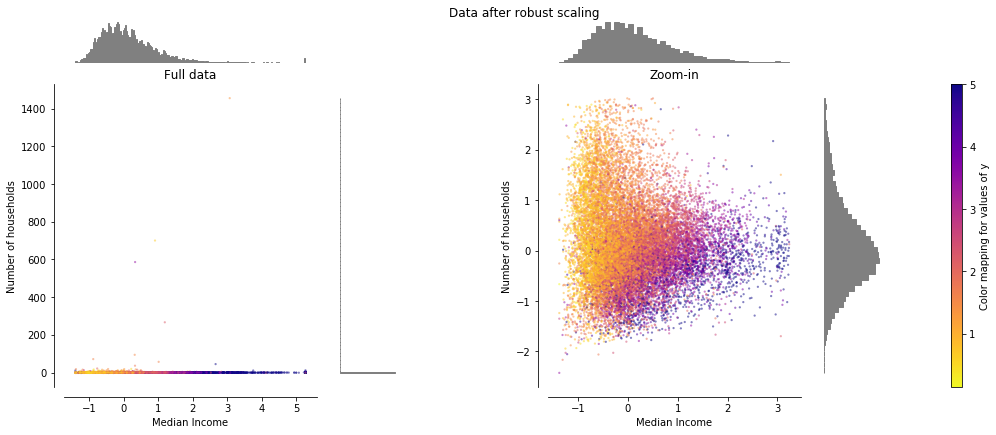

In [13]:
make_plot(4)

QuantileTransformer (Saída uniforme)
------------------------------------

``QuantileTransformer`` aplica uma transformação não linear de tal forma que a função de densidade de probabilidade de cada característica será mapeada para uma distribuição uniforme. Nesse caso, todos os dados serão mapeados na faixa [0, 1], e os outliers  não poderão ser mais distinguidos dos inliers.

Como ``RobustScaler``, ``QuantileTransformer`` é robusto para outliers, no sentido de que adicionar ou remover outliers no conjunto de treinamento renderá aproximadamente a mesma transformação em dados estendidos. Mas, contrariamente ao ``RobustScaler``, ``QuantileTransformer`` também colapsará automaticamente qualquer outlier, configurando-os para os limites de alcance definidos a priori (0 e 1).



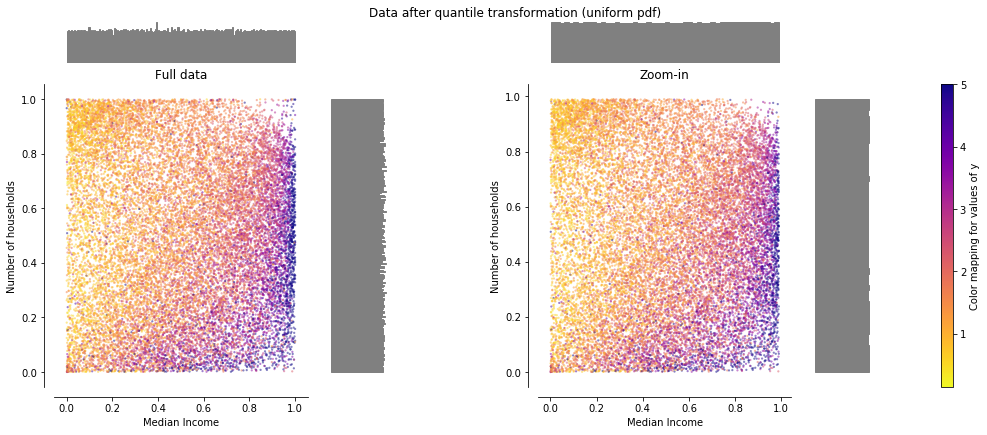

In [6]:
make_plot(5)

QuantileTransformer (Saída Gaussiana)
-------------------------------------

``QuantileTransformer`` possui um parâmetro de saída distribuição adicional que permite combinar uma distribuição gaussiana em vez de uma distribuição uniforme. Note-se que este transformador não-parametétrico apresenta artefatos de saturação para valores extremos.



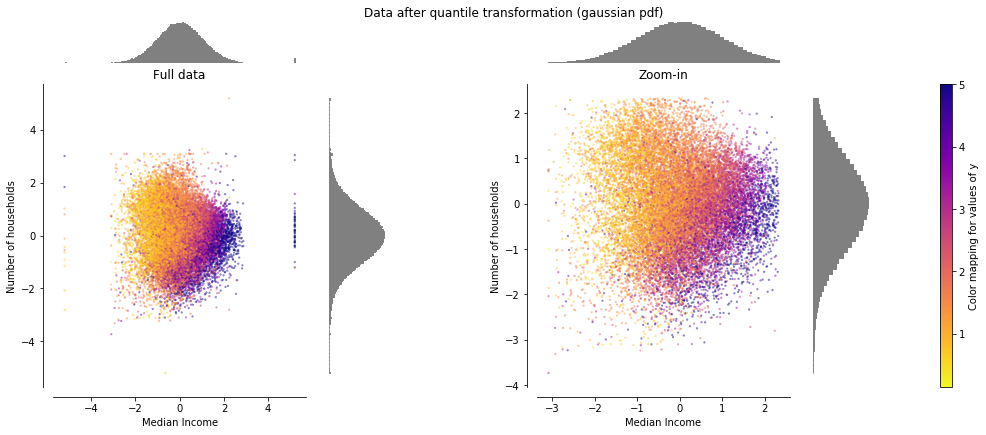

In [7]:
make_plot(6)

Normalizer
----------

O Normalizador recalcula o vetor para cada amostra para ter a norma unitária, independentemente da distribuição das amostras. Pode ser visto em ambas as figuras abaixo, onde todas as amostras são mapeadas no círculo unitário. No nosso exemplo, as duas características selecionadas possuem apenas valores positivos; portanto, os dados transformados residem apenas no quadrante positivo. Este não seria o caso se algumas características originais tivessem uma mistura de valores positivos e negativos.



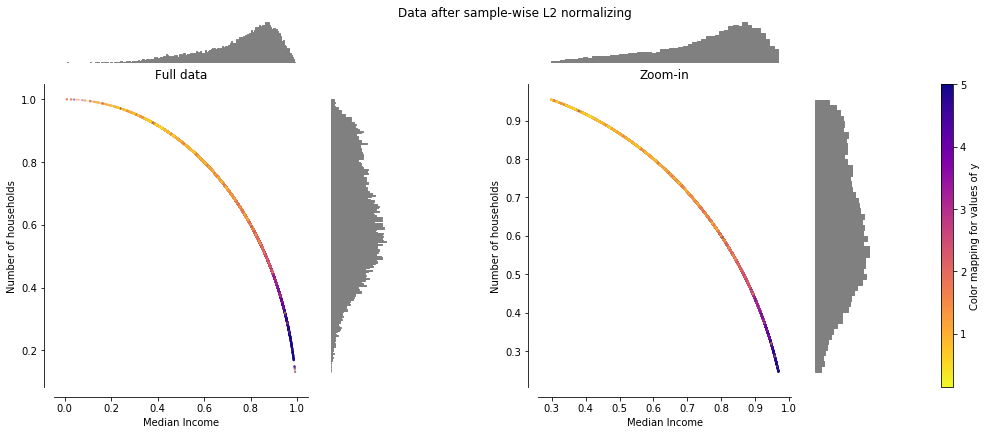

In [8]:
make_plot(7)
plt.show()